<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Load the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
data = pd.read_csv(file_path)

In [3]:
# Make a copy of original data
df = data.copy()

In [4]:
# DATA WRANGLING

import numpy as np

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'
df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

# Add JobSatPoints_6_Level column
def categorize_jobsat(val):
    if pd.isna(val):
        return np.nan
    elif val <= 14:
        return 'Very Low (0–14)'
    elif val <= 29:
        return 'Low (15–29)'
    elif val <= 44:
        return 'Fair (30–44)'
    elif val <= 59:
        return 'Moderate (45–59)'
    elif val <= 74:
        return 'High (60–74)'
    elif val <= 89:
        return 'Very High (75–89)'
    else:
        return 'Extremely High (90+)'
df['JobSatPoints_6_Level'] = df['JobSatPoints_6'].apply(categorize_jobsat)

# Standardize Country column
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}
df['Country'] = df['Country'].replace(country_mapping)

# Standardize EdLevel column
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [5]:
df_line = df.groupby('Age_Median')['ConvertedCompYearly'].median().reset_index()
df_line

,Age_Median,ConvertedCompYearly
0,10.0,7626.5
1,20.0,25000.0
2,30.0,59825.0
3,40.0,84796.0
4,50.0,99099.0
5,60.0,109691.0
6,70.0,106000.0


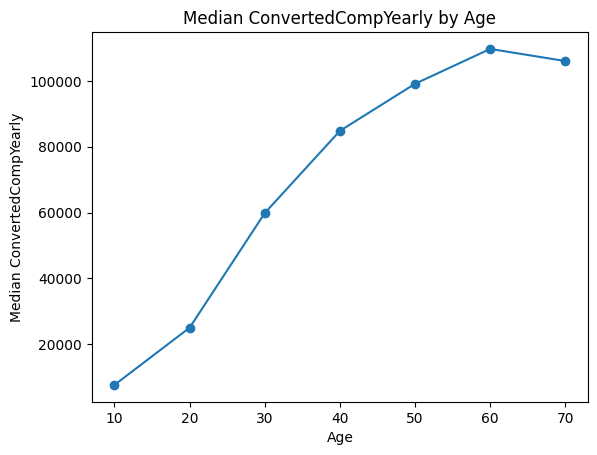

In [6]:
plt.plot(df_line['Age_Median'], df_line['ConvertedCompYearly'], marker='o')
plt.title('Median ConvertedCompYearly by Age')
plt.xlabel('Age')
plt.ylabel('Median ConvertedCompYearly')
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


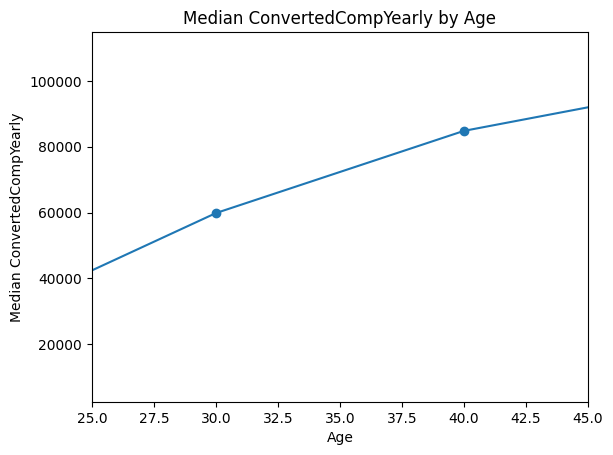

In [7]:
plt.plot(df_line['Age_Median'], df_line['ConvertedCompYearly'], marker='o')
plt.title('Median ConvertedCompYearly by Age')
plt.xlabel('Age')
plt.ylabel('Median ConvertedCompYearly')
plt.xlim(25, 45)
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [8]:
df_line = df.groupby('YearsCodePro')['JobSatPoints_6'].mean().reset_index()
df_line.head()

,YearsCodePro,JobSatPoints_6
0,1.0,25.105109
1,2.0,27.254830
2,3.0,26.324125
3,4.0,27.359300
4,5.0,25.324119


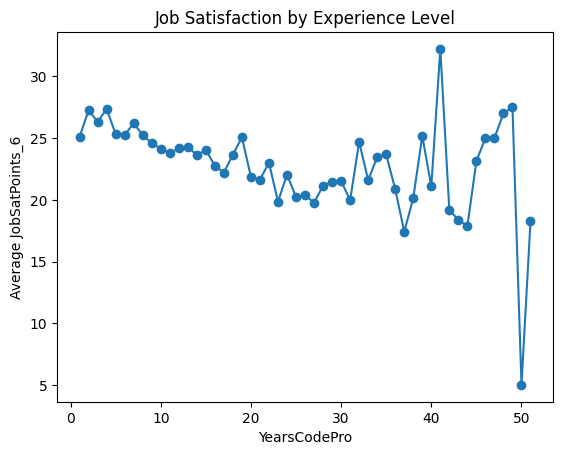

In [9]:
plt.plot(df_line['YearsCodePro'], df_line['JobSatPoints_6'], marker='o')
plt.title('Job Satisfaction by Experience Level')
plt.xlabel('YearsCodePro')
plt.ylabel('Average JobSatPoints_6')
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [10]:
df_line = df.groupby('YearsCodePro')[['JobSatPoints_6', 'ConvertedCompYearly']].median().reset_index()
df_line.head()

,YearsCodePro,JobSatPoints_6,ConvertedCompYearly
0,1.0,15.0,23302.5
1,2.0,15.0,30709.0
2,3.0,20.0,37592.0
3,4.0,20.0,45784.0
4,5.0,20.0,54777.0


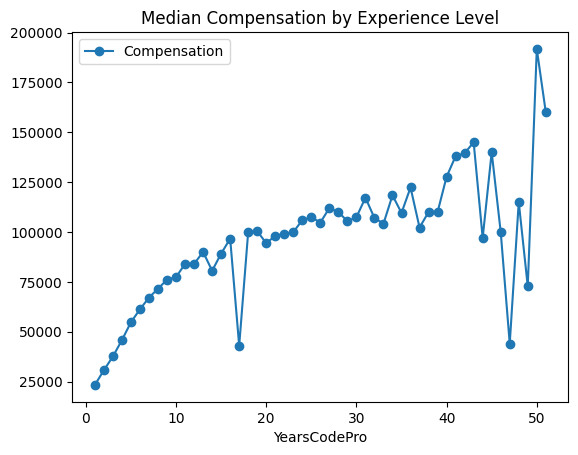

In [11]:
plt.plot(df_line['YearsCodePro'], df_line['ConvertedCompYearly'], marker='o', label='Compensation')
plt.title('Median Compensation by Experience Level')
plt.xlabel('YearsCodePro')
plt.legend()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


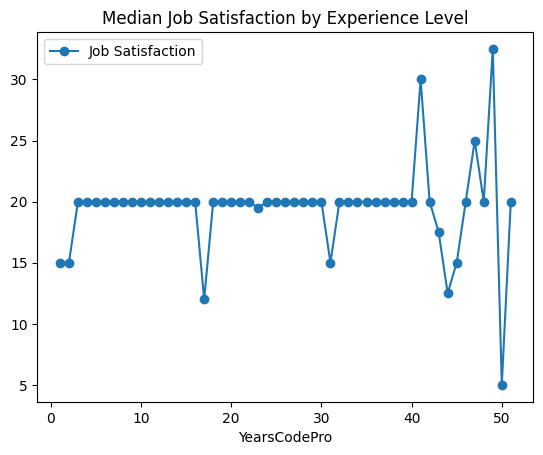

In [12]:
plt.plot(df_line['YearsCodePro'], df_line['JobSatPoints_6'], marker='o', label='Job Satisfaction')
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('YearsCodePro')
plt.legend()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
